<a href="https://colab.research.google.com/github/ramanuj-neoma/ramanuj-neoma/blob/main/Disney_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pa
import datetime as dt
import matplotlib.pyplot as plt

In [7]:
df = pa.read_excel("/content/sample_data/DIS_trades_full.xlsx",sheet_name="DIS_trades_full", 
                   header=0, index_col=None,
                   dtype={'Name': str, 'Value' : float})

In [8]:
theday = pa.Timestamp(year=1998, month=8, day=3, hour=00)
k = df.values[:,1] == theday

In [ ]:
print(df.values)

[['UN' Timestamp('1998-08-03 00:00:00') datetime.time(9, 33, 42) ... 0
  nan 'N']
 ['UN' Timestamp('1998-08-03 00:00:00') datetime.time(9, 33, 45) ... 0
  nan 'T']
 ['UN' Timestamp('1998-08-03 00:00:00') datetime.time(9, 33, 45) ... 0
  nan 'P']
 ...
 ['UN' Timestamp('1999-04-30 00:00:00') datetime.time(16, 2, 45) ... 0
  nan 'N']
 ['UN' Timestamp('1999-04-30 00:00:00') datetime.time(16, 2, 50) ... 0
  nan 'N']
 ['UN' Timestamp('1999-04-30 00:00:00') datetime.time(16, 32, 43) ... 0
  'Z' 'T']]


In [9]:
tr_day = df.values[k,1]
hms = df.values[k,2]
prices = df.values[k,3] 
volumes = df.values[k,4]
sexch = df.values[k,8]

In [ ]:
print(tr_day)

[Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:00')
 Timestamp('1999-02-05 00:00:00') Timestamp('1999-02-05 00:00:

In [ ]:
memo = df.memory_usage().sum()/8000000

In [10]:
ticker = np.unique(df.values[:,0])

In [11]:
print(ticker)

['DIS']


In [12]:
# Date and time
beg_time = min(hms)
end_time = max(hms)

In [13]:
print(beg_time)
print(end_time)

09:32:34
17:01:10


In [14]:
nb_trades = len(prices)


In [15]:
print(nb_trades)

4568


In [16]:
# Total volume
volume_tot = np.sum(volumes)
print(volume_tot)

4177500


In [17]:
# Average trade size
ave_trade = round(np.mean(volumes))
print(ave_trade)


915


42.819614711033275

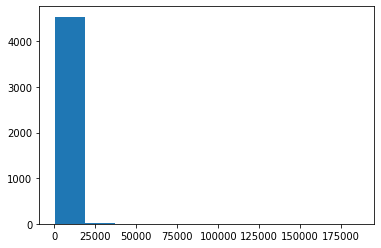

In [18]:
##lets try to quantify retail investor participation
np.unique(volumes)
plt.hist(volumes)
100*np.sum(volumes<=100)/len(volumes)

In [19]:
# Prices
f_prices = prices[0] 
e_prices = prices[-1]

print(f_prices)
print(e_prices)

34.5625
34.6875


In [20]:
# Time between transactions

HMS = np.empty(len(hms),dtype=object)
for x in range(len(hms)):
    HMS[x] = dt.datetime.combine(theday,hms[x])
secdiff = np.empty(len(HMS)-1)    
for t in range(1,len(HMS)):
    secdiff[t-1] = (HMS[t]-HMS[t-1]).total_seconds() 

In [21]:
print(np.mean(secdiff))

5.8935844098970875


In [22]:
print(np.percentile(secdiff,25))

1.0


In [23]:
# Generate the summary file

print('Ticker:', ticker)
print('Trading day:',theday)
print('Time range: From',beg_time,'to',end_time)
print('Nb. of trades:', nb_trades)
print('Total volume:',volume_tot)
print('Average trade size:',ave_trade)
print('First price:', f_prices)
print('Last price:', e_prices)
print('Nb. of seconds between trades:',np.round(np.mean(secdiff)))

Ticker: ['DIS']
Trading day: 1998-08-03 00:00:00
Time range: From 09:32:34 to 17:01:10
Nb. of trades: 4568
Total volume: 4177500
Average trade size: 915
First price: 34.5625
Last price: 34.6875
Nb. of seconds between trades: 6.0


Text(0.5, 1.0, 'Distribution of time between trades (in  seconds)')

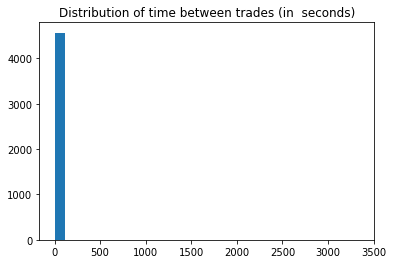

In [24]:
# Distribution of time differences between trades
plt.hist(secdiff,30)
plt.title('Distribution of time between trades (in  seconds)')

In [25]:
# Statistics by trading hour

secdiff2 = np.append(secdiff,np.nan)
trades_bh = np.empty(7)
volume_bh = np.empty(7)
secdiff_bh = np.empty(7)

for i in range(9,16):
    print(i)
    k = (HMS > dt.datetime(1998,8,3,i,0,0)) & \
    (HMS < dt.datetime(1998,8,3,i+1,0,0))
    trades_bh[i-9] = len(prices[k])
    volume_bh[i-9] = np.sum(volumes[k])
    secdiff_bh[i-9] = np.nanmean(secdiff2[k])
    

9
10
11
12
13
14
15


In [26]:
print(trades_bh)
print(volume_bh)
print(secdiff_bh)

[792. 775. 724. 545. 490. 544. 684.]
[694400. 869600. 672800. 325800. 411000. 444100. 643200.]
[2.08838384 4.64129032 4.97651934 6.60366972 7.34081633 6.625
 5.25146199]


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Average time between trades')

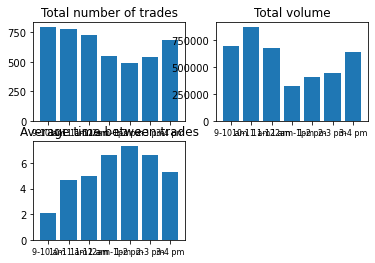

In [27]:
x = np.arange(7)  
trng = ('9-10 am','10-11 am','11-12 am','12am-1pm', \
        '1-2 pm','2-3 pm','3-4 pm') 
from IPython.display import Javascript
display(Javascript("google.colab.output.resizeIframeToContent()"))

plt.subplot(2,2,1)
plt.bar(x,trades_bh)
plt.xticks(x, trng,fontsize=8)
plt.title('Total number of trades')
plt.subplot(2,2,2)
plt.bar(x,volume_bh)
plt.xticks(x, trng,fontsize=8)
plt.title('Total volume')
plt.subplot(2,2,3)
plt.bar(x,secdiff_bh)
plt.xticks(x, trng,fontsize=8)
plt.title('Average time between trades')


Text(0.5, 1.0, 'Average time (Min.) between two consecutive transactions')

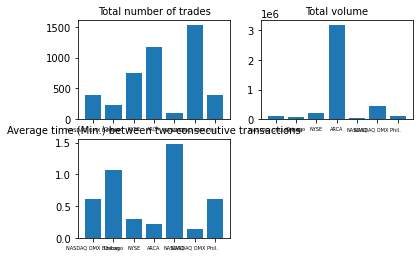

In [28]:
#######################################################
# Statistics by stock exchange

# "N" : NYSE
# "T" : NASDAQ
# "P" : ARCA
# "M" : Chicago
# "B" : NASDAQ OMX Boston
# "X" : NASDAQ OMX Philadelphia

u_sexch = np.unique(sexch)
l = len(u_sexch)
trades_bh = np.empty(l)
volume_bh = np.empty(l)
secdiff_bh = np.empty(l)

for i in range(l):
    k = sexch == u_sexch[i]
    trades_bh[i] = len(prices[k])
    volume_bh[i] = np.sum(volumes[k])
    SubHMS = HMS[k]
    secdiff = np.empty(len(SubHMS)-1)    
    for t in range(1,len(SubHMS)):
        secdiff[t-1] = (SubHMS[t]-SubHMS[t-1]).total_seconds() 
    secdiff_bh[i] = np.median(secdiff)
    
x = np.arange(l)  
trng = ('NASDAQ OMX Boston', 'Chicago', 'NYSE','ARCA', \
        'NASDAQ', 'NASDAQ OMX Phil.') 
plt.subplot(2,2,1)
plt.bar(x,trades_bh)
plt.xticks(x, trng,fontsize=5)
plt.xticks(fontsize=5)
plt.title('Total number of trades',fontsize=10)
plt.subplot(2,2,2)
plt.bar(x,volume_bh)
plt.xticks(x, trng,fontsize=5)
plt.title('Total volume',fontsize=10)
plt.subplot(2,2,3)
plt.bar(x,secdiff_bh/60)
plt.xticks(x, trng,fontsize=5)
plt.title('Average time (Min.) between two consecutive transactions',fontsize=10)